## Learning Objectives

Today we explore the most important tradeoff in ML: the approximation generalization tradeoff. And we learn how this tradeoff effects almost every ML decision on the books.

## The most important graphs

Today we are going to be exploring the most important tradeoff in machine learning: the approximation generalization tradeoff. And we are going to explore this tradeoff by means of some very important graphs, so let's get started.

First off I am going to create some very unoriginal data: a sine wave. Let me show you what a couple hundred draws from this distribution looks like:

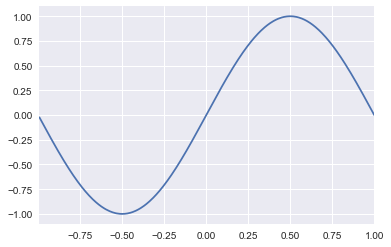

In [9]:
%matplotlib inline
import numpy as np
import seaborn as sns

X = np.random.uniform(-1, 1, size=1000)
y = np.sin(np.pi * X)

sns.tsplot(y, X)

Now you know the drill. We would put some points in test and others in train and blah blah blah. Well you are absolutely correct, but today we are doing this exercise to show off an important point. So we are skipping the normal process. 

Instead we are exploring what happens as we vary two important quantities: the number of data points and the size of the hypothesis set. 

Let's start off with a simple example. Let's explore two sets of hypothesis functions:

1. f(X) = w_0 = y
2. f(X) = w_0 + w_1 * x_1 = y

Notice the first hypothesis is a constant function. That is right we will simply ignore the input and always guess the same thing. The second hypothesis set is much bigger. It has 2 infinite parameters instead of 1. the second hypothesis is linear regression with an intercept. 

Now you know that for the first hypothesis we should ideally have 10 data points, and for the second we should have at least 20, but let's explore what happens if we just have 2. Yes that's right, 2.

First let's estimate the in sample/training error by running our regressions 1000 times on the dataset:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import add_dummy_feature
from sklearn.metrics import mean_squared_error

In [54]:
h0_scores = []
h1_scores = []
h0_models = []
h1_models = []

for _ in range(1000):
    X = np.random.uniform(-1, 1, size=2)
    y = np.sin(np.pi * X)
    
    reg0 = LinearRegression(fit_intercept=False)
    reg1 = LinearRegression(fit_intercept=False)
    
    # this hypothesis ignores the X variable
    reg0.fit(np.ones((2, 1)), y)
    # this hypothesis can use the X variable as well as an intercept
    reg1.fit(add_dummy_feature(X[:, None]), y)
    
    # now we score both hypotheses on the traning data
    preds = reg0.predict(np.ones((2, 1)))
    h0_scores.append(mean_squared_error(preds, y))
    preds = reg1.predict(add_dummy_feature(X[:, None]))
    h1_scores.append(mean_squared_error(preds, y))
    
    # finally we store the models
    h0_models.append(reg0)
    h1_models.append(reg1)

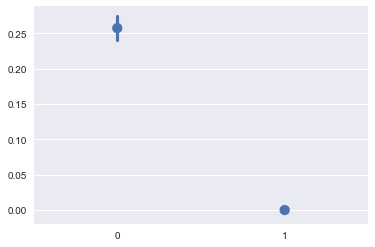

In [55]:
%matplotlib inline
import seaborn as sns

sns.pointplot(data=[h0_scores, h1_scores], join=False)

Okay well looks like the simpler hypothesis set did poorly. Whereas the more complicated one did really really well! It actually had 0 error (this is because two points make a line so there is a way to get zero error for the above example). 

But you probably see where we are going right?

Now let's look to see how these estimators do on data that they weren't trained on:

In [64]:
h0_test_scores = []
h1_test_scores = []

for i in range(1000):
    X = np.random.uniform(-1, 1, size=50)
    y = np.sin(np.pi * X)
    
    reg0 = h0_models[i]
    reg1 = h1_models[i]
    
    # we score both hypotheses on the 'test' data
    preds = reg0.predict(np.ones((50, 1)))
    h0_test_scores.append(mean_squared_error(preds, y))
    preds = reg1.predict(add_dummy_feature(X[:, None]))
    h1_test_scores.append(mean_squared_error(preds, y))

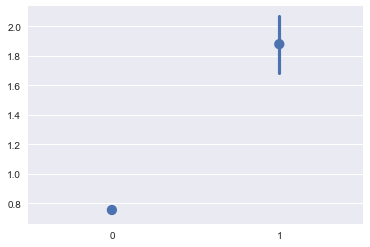

In [65]:
sns.pointplot(data=[h0_test_scores, h1_test_scores], join=False)

Wow, what a difference! Hypothesis 0 did much worse than it originally predicted it would do, but hypothesis 1 did much much worse than it was looking previously. What happened? 

Well this effect is called the generallization approximation tradeoff. What does that mean?

Well with large hypothesis sets we can approximate functions very well. This means that we can fit the training data very well and the error we will get on the training data will be very small.

Generalization happens when a model is able to do just as well on the test data as it does on the training data. Simple hypothesis sets tend to generalize better than more complex ones.

We can approximate functions better by choosing larger hypothesis sets and we can generalize better by getting more data and keeping the hypothesis set low. Because there is this tradeoff, often people will choose the complexity of their model based on the data they have. 

So I know that I have repeated this one concept a ton of times, but it is very important. So let's show this in action. I am going to show off this idea for the two functions that I am using above:

In [69]:
train_errors = []
test_errors = []
for num_points in range(2, 40):
    train_error = []
    test_error = []
    for trail in range(100):
        X_train = np.random.uniform(-1, 1, size=num_points)
        y_train = np.sin(np.pi * X_train)

        reg = LinearRegression(fit_intercept=False)

        # this hypothesis ignores the X variable
        reg.fit(np.ones((num_points, 1)), y_train)

        # now we score both hypotheses on the traning data
        preds = reg.predict(np.ones((num_points, 1)))
        train_error.append(mean_squared_error(preds, y_train))
        
        X_test = np.random.uniform(-1, 1, size=50)
        y_test = np.sin(np.pi * X_test)
        
        preds = reg.predict(np.ones((50, 1)))
        test_error.append(mean_squared_error(preds, y_test))

    train_errors.append(train_error)
    test_errors.append(test_error)

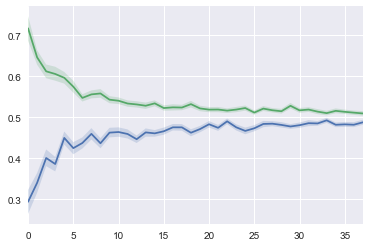

In [80]:
# now we plot them :)
sns.tsplot(np.array([train_errors, test_errors]).T, range(2, 40))

Is this what you expected?

We see two things happening here. 

1. The train error is slowly increasing. This is because as the number of training points increases the harder it is for a single function to approximate. However it levels off eventually to what would be the best solution if you actually had all the data in the world (in our case always predicting 0)
2. The test error goes down/closer to the train error. Why is this? Well there are a lot of reasons. As we increase in the number of data points the bounds we get from training become tighter, so it is more likely that the test error will be closer to the train error. But to view it in another light, as the amount of training data increases, the more the training situation looks like the testing one.

You will see this every time. 

Now let's check out what our second hypothesis set looks like:

In [81]:
train_errors = []
test_errors = []
for num_points in range(2, 40):
    train_error = []
    test_error = []
    for trail in range(100):
        X_train = np.random.uniform(-1, 1, size=num_points)
        y_train = np.sin(np.pi * X_train)

        reg = LinearRegression(fit_intercept=False)

        # this hypothesis ignores the X variable
        reg.fit(add_dummy_feature(X_train[:, None]), y_train)

        # now we score both hypotheses on the traning data
        preds = reg.predict(add_dummy_feature(X_train[:, None]))
        train_error.append(mean_squared_error(preds, y_train))
        
        X_test = np.random.uniform(-1, 1, size=50)
        y_test = np.sin(np.pi * X_test)
        
        preds = reg.predict(add_dummy_feature(X_test[:, None]))
        test_error.append(mean_squared_error(preds, y_test))

    train_errors.append(train_error)
    test_errors.append(test_error)

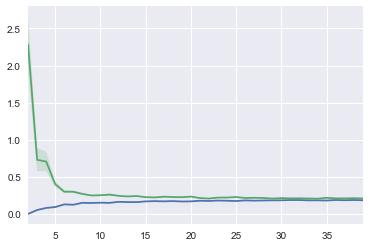

In [83]:
# now we plot them :)
sns.tsplot(np.array([train_errors, test_errors]).T, range(2, 40))

Notice two things:

1. The error on a small number number of data points is much bigger than the error above. The hypothesis was too complex for the number of data points
2. The quality of the hypothesis at 20 data points is much better than the quality of the previous hypothesis set

There are two quantities that we like to measure on these types of graphs. The first is the distance from 0 to the training error. We call this the approximation error. The second is the distance from the training error to the test error. We call this the generalization error. 

Notice that as we increase the number of data points the approximation error increases. But the generalization error decreases. This is the tradeoff. 

Now as a final treat, let's explore a graphic that will show us what happens as we increase the complexity of the hypothesis set and the number of data points:

In [95]:
from sklearn.preprocessing import PolynomialFeatures

model_train_errors = []
model_test_errors = []
model_generalization_error = []
for model_complexity in range(3):
    train_errors = []
    test_errors = []
    generalization_error = []
    for num_points in range(2, 20):
        train_error = 0
        test_error = 0
        for trail in range(100):
            X_train = np.random.uniform(-1, 1, size=num_points)
            y_train = np.sin(np.pi * X_train)
            
            poly = PolynomialFeatures(model_complexity)
            X_train = poly.fit_transform(X_train[:, None])

            reg = LinearRegression(fit_intercept=False)

            reg.fit(X_train, y_train)

            # now we score both hypotheses on the traning data
            preds = reg.predict(X_train)
            train_error += mean_squared_error(preds, y_train)

            X_test = np.random.uniform(-1, 1, size=50)
            y_test = np.sin(np.pi * X_test)

            X_test = poly.fit_transform(X_test[:, None])
            preds = reg.predict(X_test)
            test_error += mean_squared_error(preds, y_test)
            
        train_error /= 100
        test_error /= 100

        train_errors.append(train_error)
        test_errors.append(test_error)
        generalization_error.append(test_error - train_error)
        
    model_train_errors.append(train_errors)
    model_test_errors.append(test_errors)
    model_generalization_error.append(generalization_error)

First the train error. Notice that as the number of data points increases the train error increases. Notice also that as the model complexity increases the train error decreases:

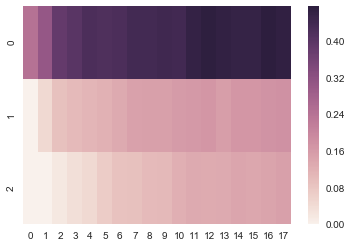

In [96]:
sns.heatmap(model_train_errors)

Next generalization error. Can you see the tradeoff? Notice that as the number of data points increases the generalization error decreases. Notice as the complexity of the model increases the generalization error increases.

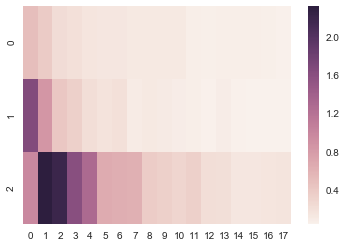

In [99]:
sns.heatmap(model_generalization_error)

And finally what we ultimately care about, the test error. Now you notice that there is a sweet spot (at least in the hypotheses that I have printed here. Hypothesis 0 may be better than h1 (linear regression) for very low data point regimes, but h1 becomes better after we get enough data points. h2 (w_0 + w_1 * x_1 + w_2 * x_1^2) is even more complex and the generalization error is very big even though the train error is very small. Thus we would need even more data points for it to be able to compete with the other hypotheses (around 30 would be good).

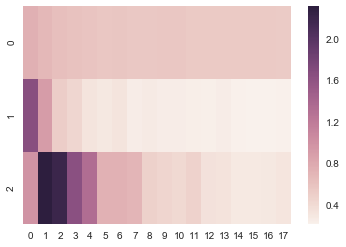

In [100]:
sns.heatmap(model_test_errors)

## What's next

Above I showed you the three important phenomena surrounding model complexity + data points and train, test and generalization error. These are very important to understand intuitively, theoretically and practically because this is the crux of machine learning. 

Next time we are going to be going over the same thing from another perspective and talking about the bias variance tradeoff.

## Learning Objectives

Today we explore the most important tradeoff in ML: the approximation generalization tradeoff. And we learn how this tradeoff effects almost every ML decision on the books.

## Comprehension Questions

1.	Why are we exploring the number of data points and the size of the hypothesis set? Is there anything more important?
2.	Do you think more complex hypothesis sets have higher or lower variance on the train error?
3.	As you increase the number of datapoints does the training error increase or decrease? 
4.	As you increase the number of test points what happens to the test error?
5.	As you increase the fraction of your points used in the test set what happens to the test error?
6.	Do we care more about approximation error or generalization error?
